In [18]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#from minisom import MiniSom
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree, cophenet

In [19]:
data = pd.read_csv(r"C:\Users\sidra\Downloads\Wholesale customers data.csv")
df = data.copy()
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<div style="float: left;">

| Variable              | Description                                 |
|-----------------------|---------------------------------------------|
| FRESH                 | Annual spending on fresh products           | 
| MILK                  | Annual spending on milk products            | 
| GROCERY               | Annual spending on grocery products         | 
| FROZEN               | Annual spending on frozen products          | 
| DETERGENT/PAPER       | Annual spending on detergent and paper products | 
| DELICATESSEN          | Annual spending on delicatessen products    |

Since 'Region' and 'Channel' are categorical variables, we will not include them in the analysis.

In [20]:
df.shape

(440, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


From the descriptive statistics, we can observe that the standard deviations of the data are quite high, and the data does not conform to a normal distribution.

In [23]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


# 📊 EDA 

## Categorical Data

### Channel Variable
The 'Channel' variable indicates through which channels customers make purchases, which can be Hotel/Restaurant/Café or Retail. The variable type is categorical.

There are 2 unique values. The channel coded with a weight of **1** is predominant. It can be noted that the distribution is imbalanced.


In [24]:
df['Channel'].unique()

array([2, 1], dtype=int64)

1    298
2    142
Name: Channel, dtype: int64

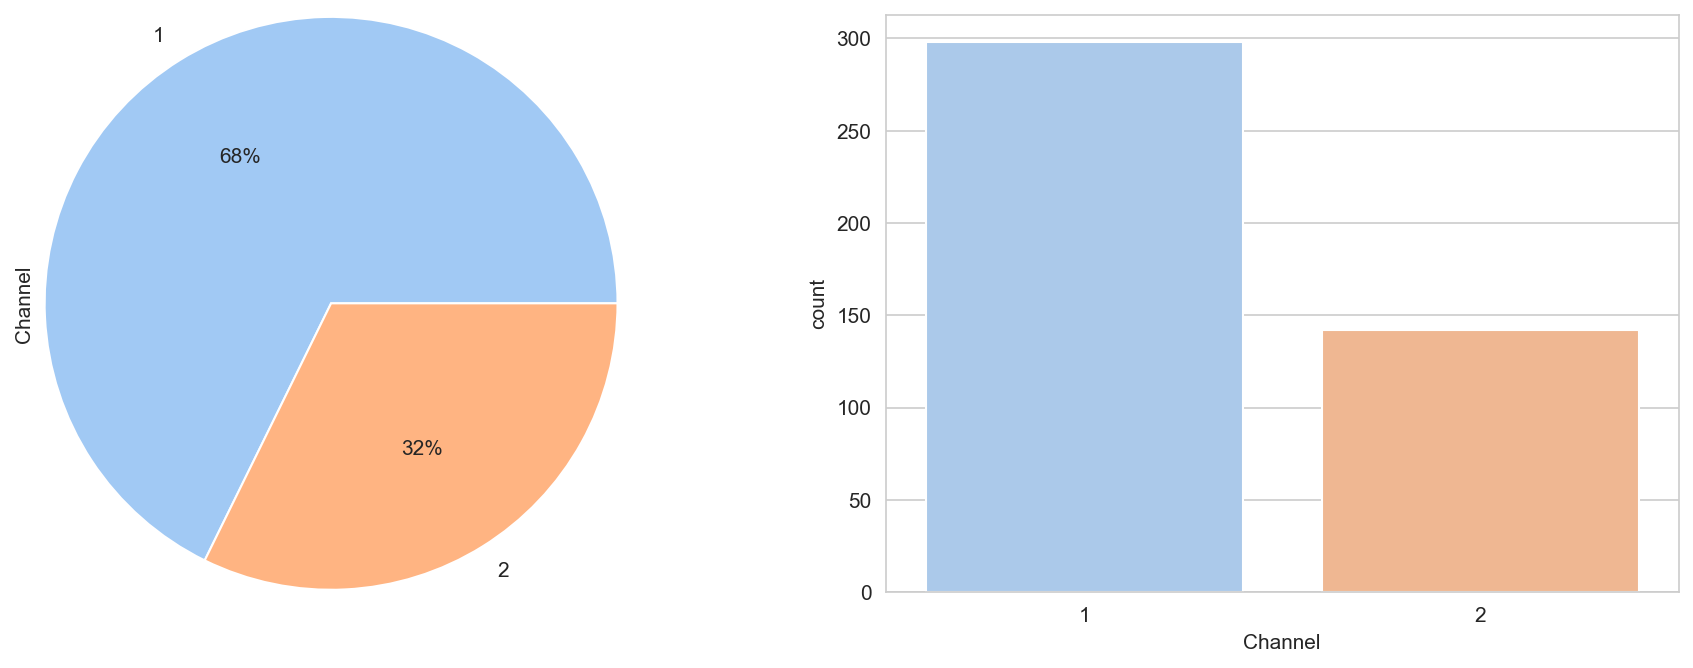

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['Channel'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='Channel', palette='pastel')
df['Channel'].value_counts()

### Region Variable
The 'Region' variable indicates from which regions customers make purchases, which can be Istanbul/Izmir/Ankara. The variable type is categorical.

There are 3 unique values. The region coded with a weight of **3** is predominant. The imbalance here is greater compared to the Channel variable.

In [26]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

3    316
1     77
2     47
Name: Region, dtype: int64

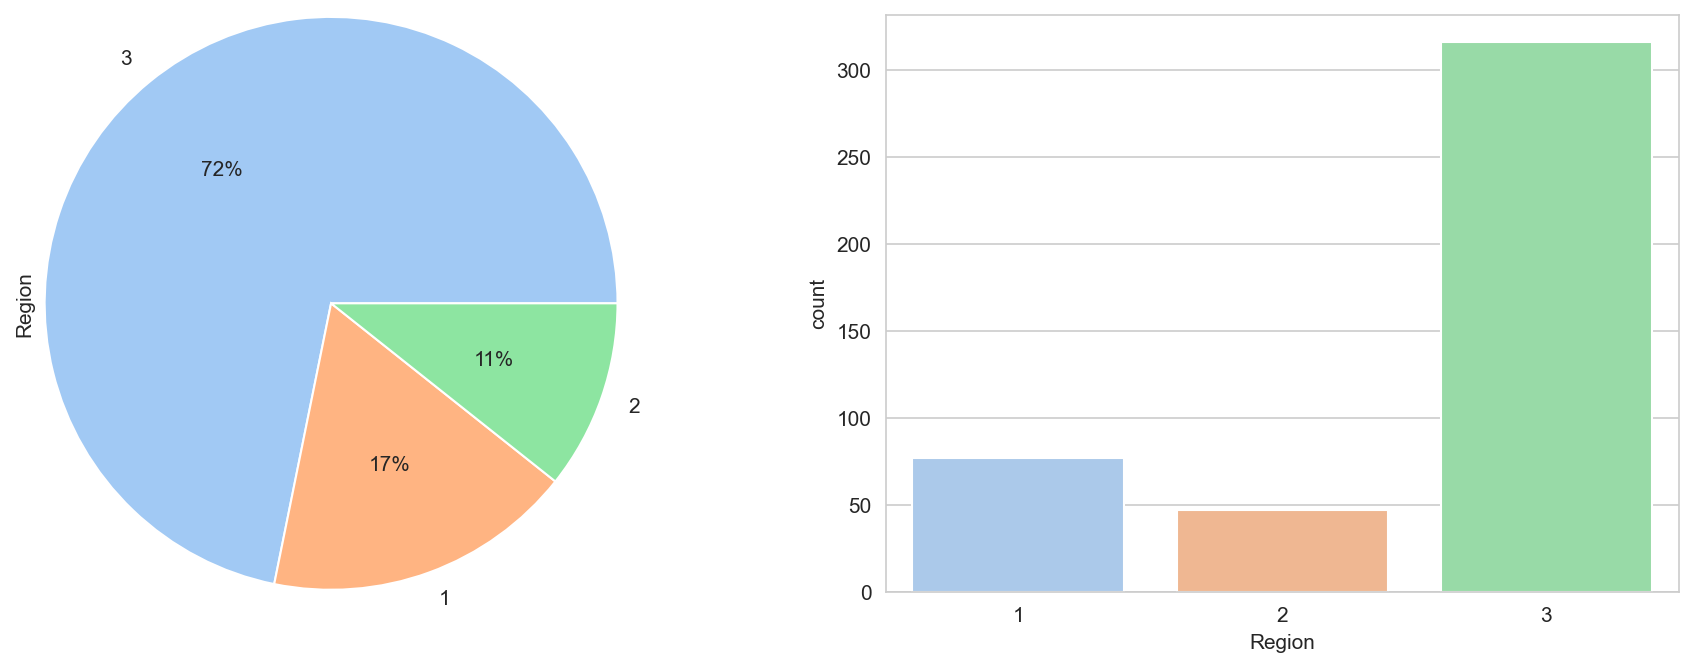

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['Region'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='Region', palette='pastel')
df['Region'].value_counts()

## Numerical Variables

In [28]:
# Drop categorical variables
df.drop(['Region', 'Channel'], axis=1, inplace=True)

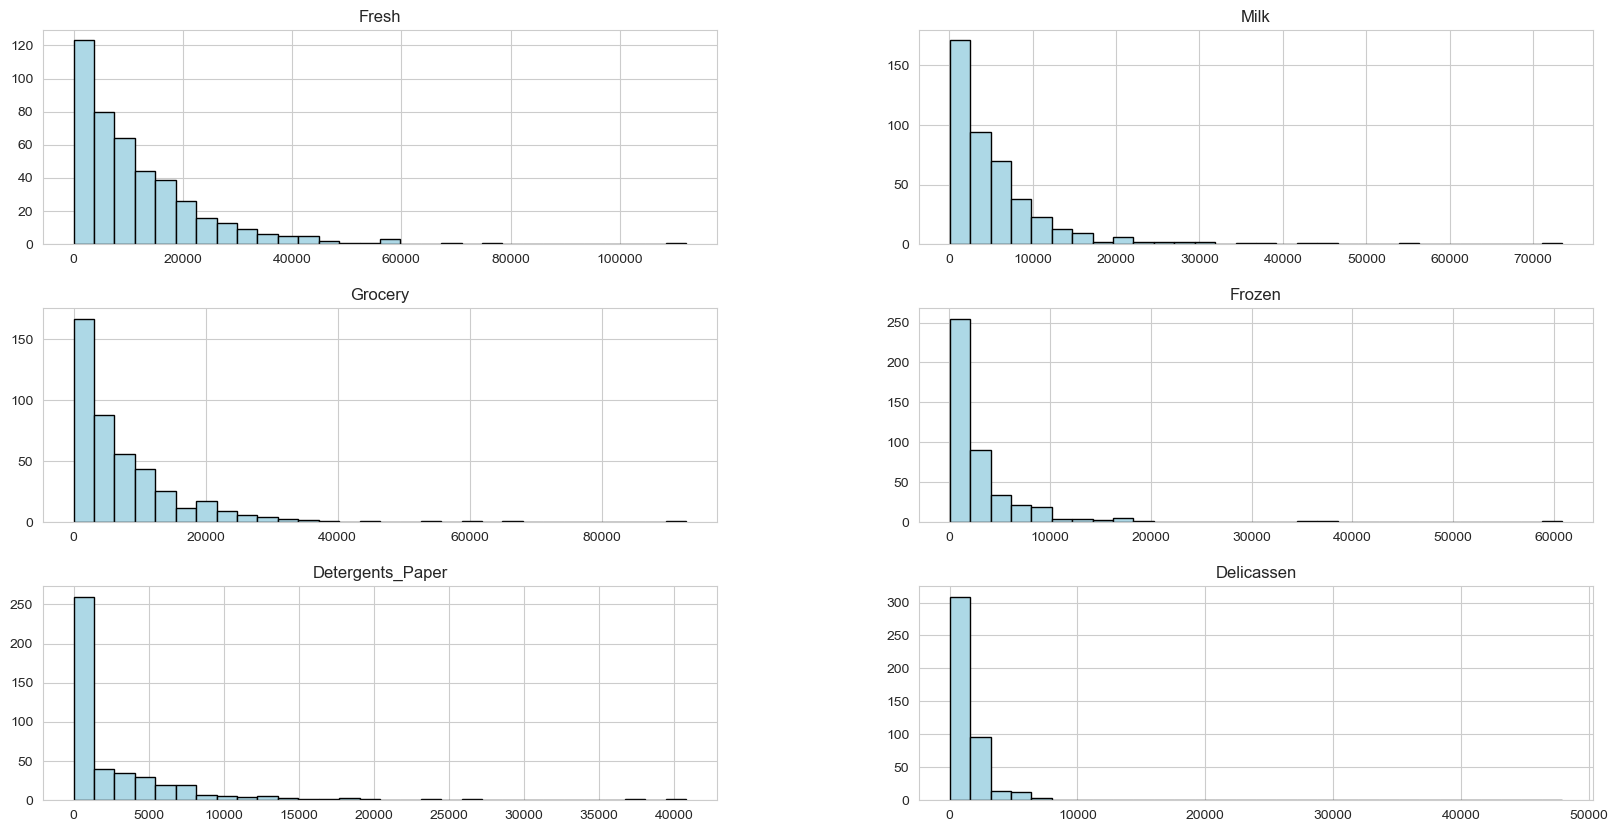

In [29]:
df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

**From this output, we can infer that the distributions of variables are highly skewed, and there may be outliers.**

## Skewness and Kurtosis

In [30]:
skewness = df.skew()
kurtosisness = df.kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness Coefficient', 'Skewness', 'Kurtosis Coefficient', 'Kurtosis']

table_data = []
for col in df.columns:
    stat, p = normaltest(df[col])
    normal_dist = 'Yes' if p >= 0.05 else 'No'
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'Highly skewed' if skewness[col] < -1 or skewness[col] > 1 else 'Symmetric or mildly skewed'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Very flat or sharp' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal or mildly flat'

    stat_sh, p_sh = shapiro(df[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'
    
    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)


+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|     Variable     | Shapiro Test | Skewness Coefficient |   Skewness    | Kurtosis Coefficient |      Kurtosis      |
+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|      Fresh       |      No      |        2.5613        | Highly skewed |       11.5364        | Very flat or sharp |
|       Milk       |      No      |        4.0538        | Highly skewed |       24.6694        | Very flat or sharp |
|     Grocery      |      No      |        3.5874        | Highly skewed |       20.9147        | Very flat or sharp |
|      Frozen      |      No      |        5.9080        | Highly skewed |       54.6893        | Very flat or sharp |
| Detergents_Paper |      No      |        3.6319        | Highly skewed |       19.0095        | Very flat or sharp |
|    Delicassen    |      No      |       11.151

In [31]:
normality=pd.DataFrame(index=['p-value', 'test-statistic'])
for i in df.columns:
    normality[i]=shapiro(df[i])
    
normality.T  

,p-value,test-statistic
Fresh,0.781436,7.918438e-24
Milk,0.628334,9.762062e-30
Grocery,0.676230,3.906127e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicassen,0.361068,1.753408e-36


The distributions are highly skewed and flat. If we perform clustering in this state, the skewed values in the variables can lead to extreme results in distance measurements. To avoid this, we will take the logarithm of the data. This process can make the distribution of the data more symmetric and improve clustering results.

Points to consider before applying the logarithmic transformation:
1. Logarithmic transformation is particularly effective for right-skewed data.
2. There should be no zero or negative values in the dataset.
3. It may yield more balanced results when variables in the dataset have equal importance.

In [32]:
# log transform
df = np.log(df)

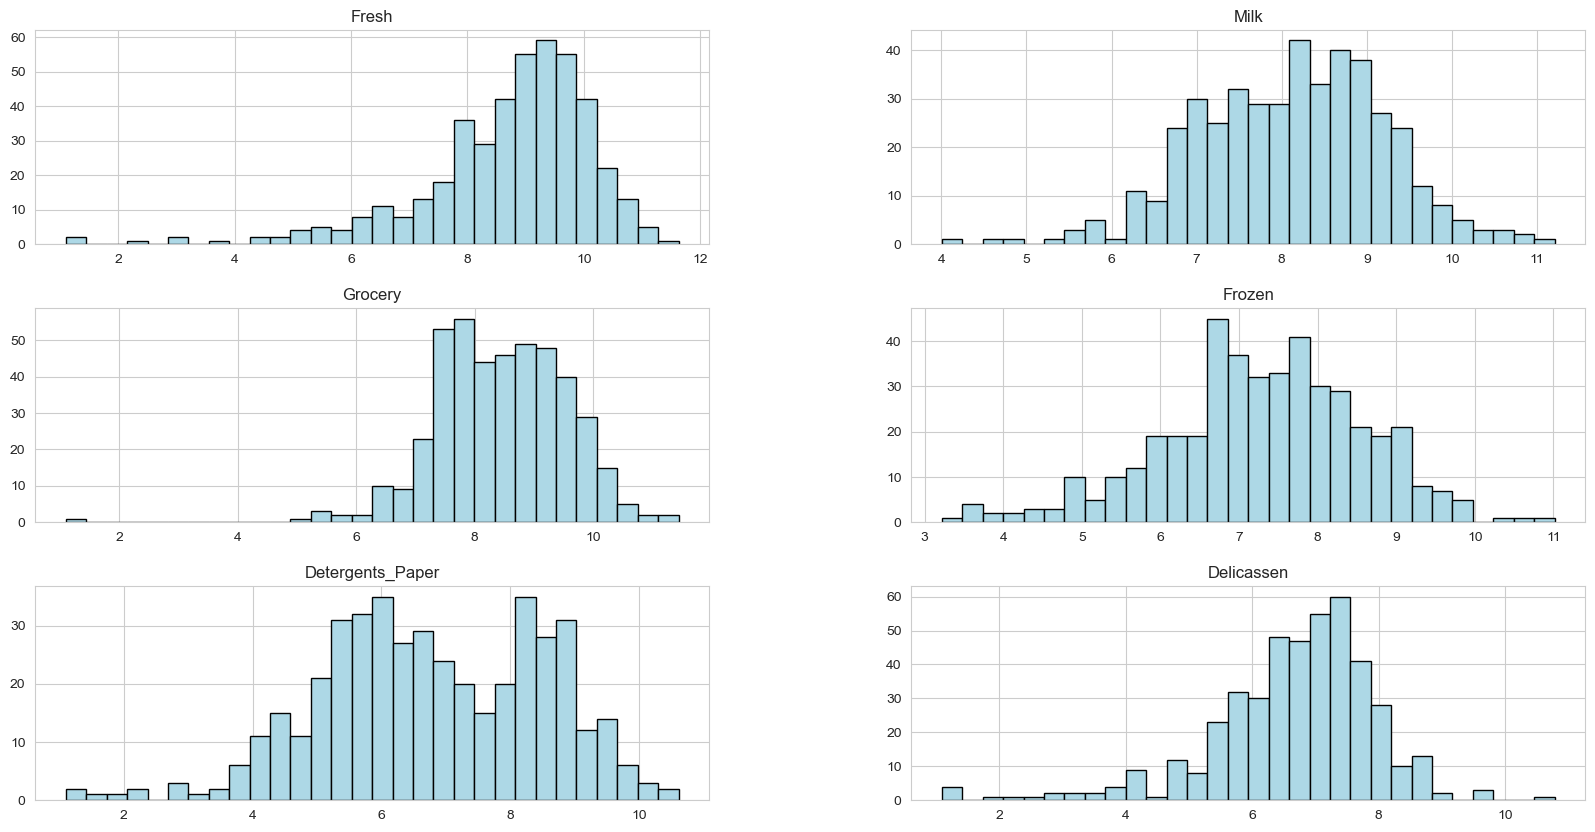

In [33]:
df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

**After the transformation, we can observe that the data has become more balanced.**

## Normal Distribution Check

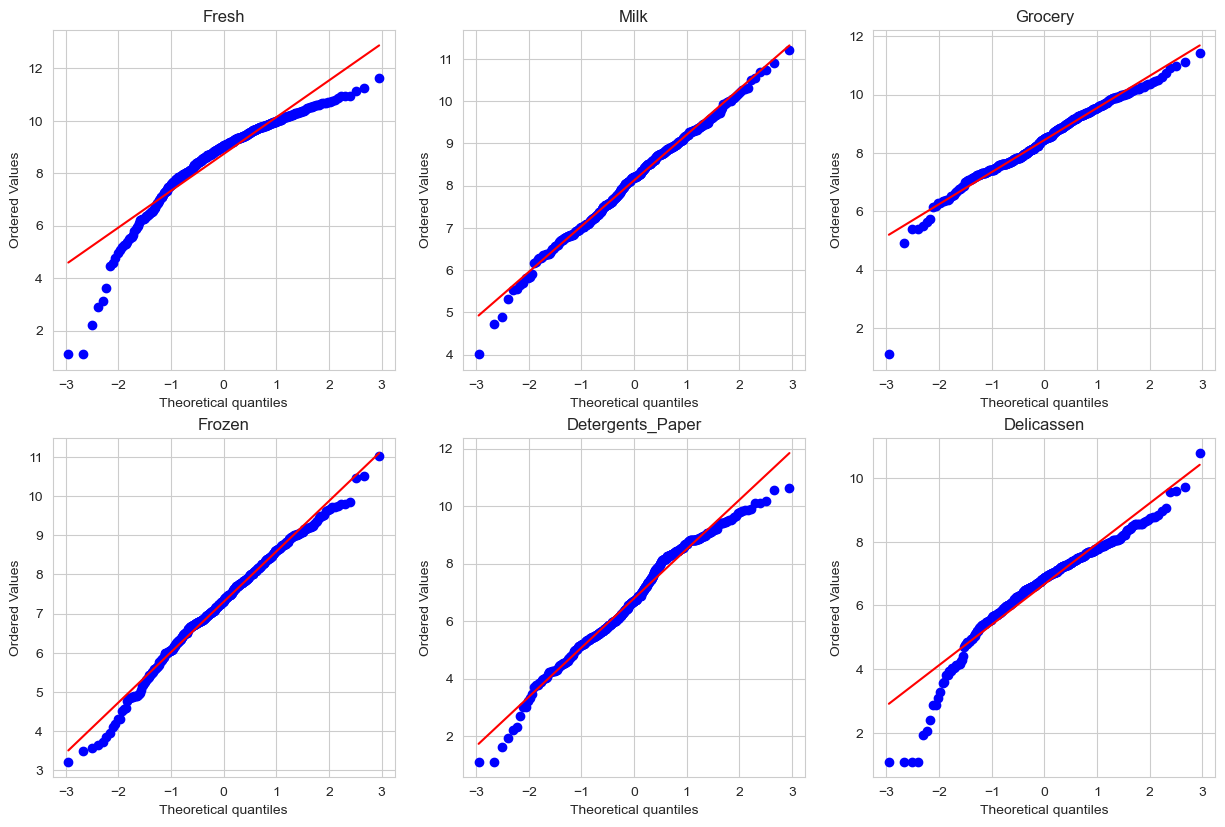

In [34]:
plt.figure(figsize=(15,15))
for i,var in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    probplot(df[var], plot=plt)
    plt.title(f'{var}')
plt.show()  

**The variables have generally captured a normal distribution. From this output, we can sense that there may be outliers in the dataset.**

## Variability


<Axes: >

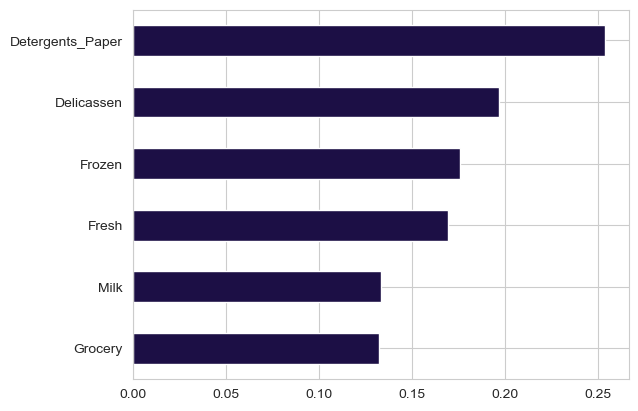

In [35]:
variability_coefficient = df.std() / df.mean()
sorted_vc = variability_coefficient.sort_values()
sorted_vc.plot.barh(x='Variables', y='Variability Coefficient', color='#1c0f45')

**Detergents_Paper has exhibited a wider variation compared to the others.**


## Box Plots

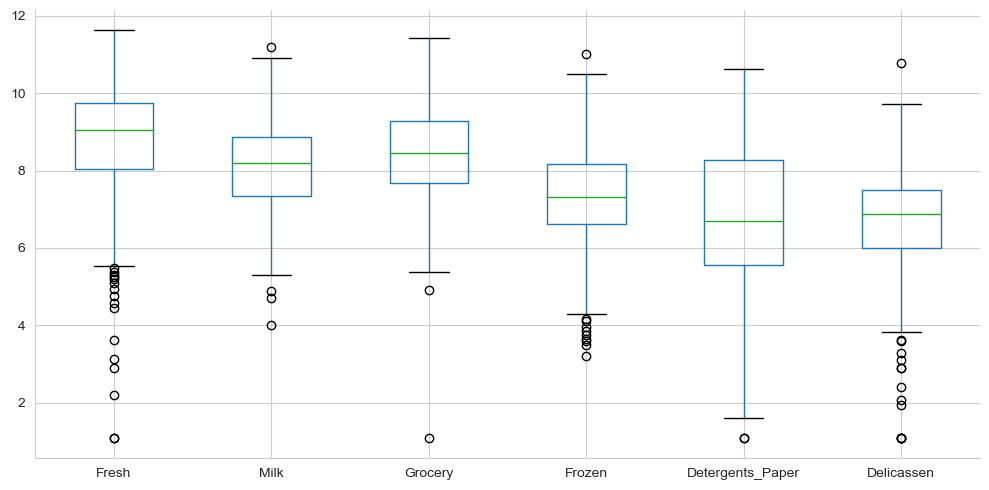

In [36]:
plt.figure(figsize=(10, 5))
df.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

**Particularly, outliers in the 'Fresh' and 'Delicassen' variables are noteworthy.**

## Correlation

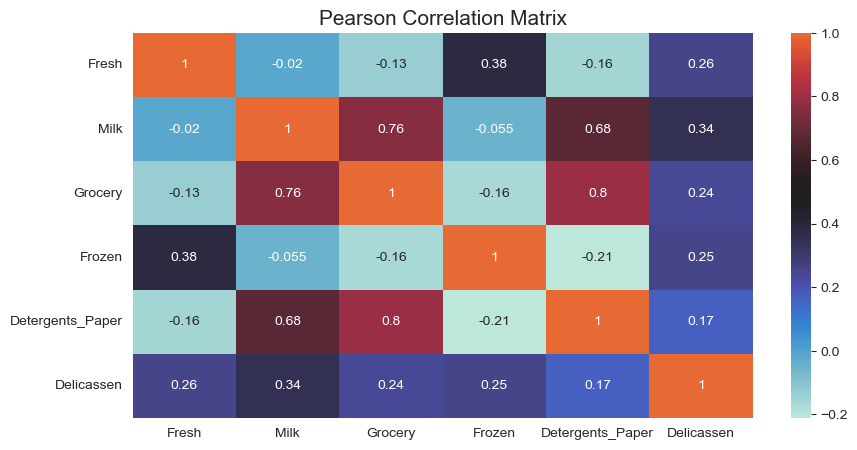

In [37]:
corr=df.corr()
plt.figure(figsize=(10,5))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(corr, center=0.5,annot=True)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

**'Grocery', 'Detergents_Paper', and 'Milk' have shown high correlation.**

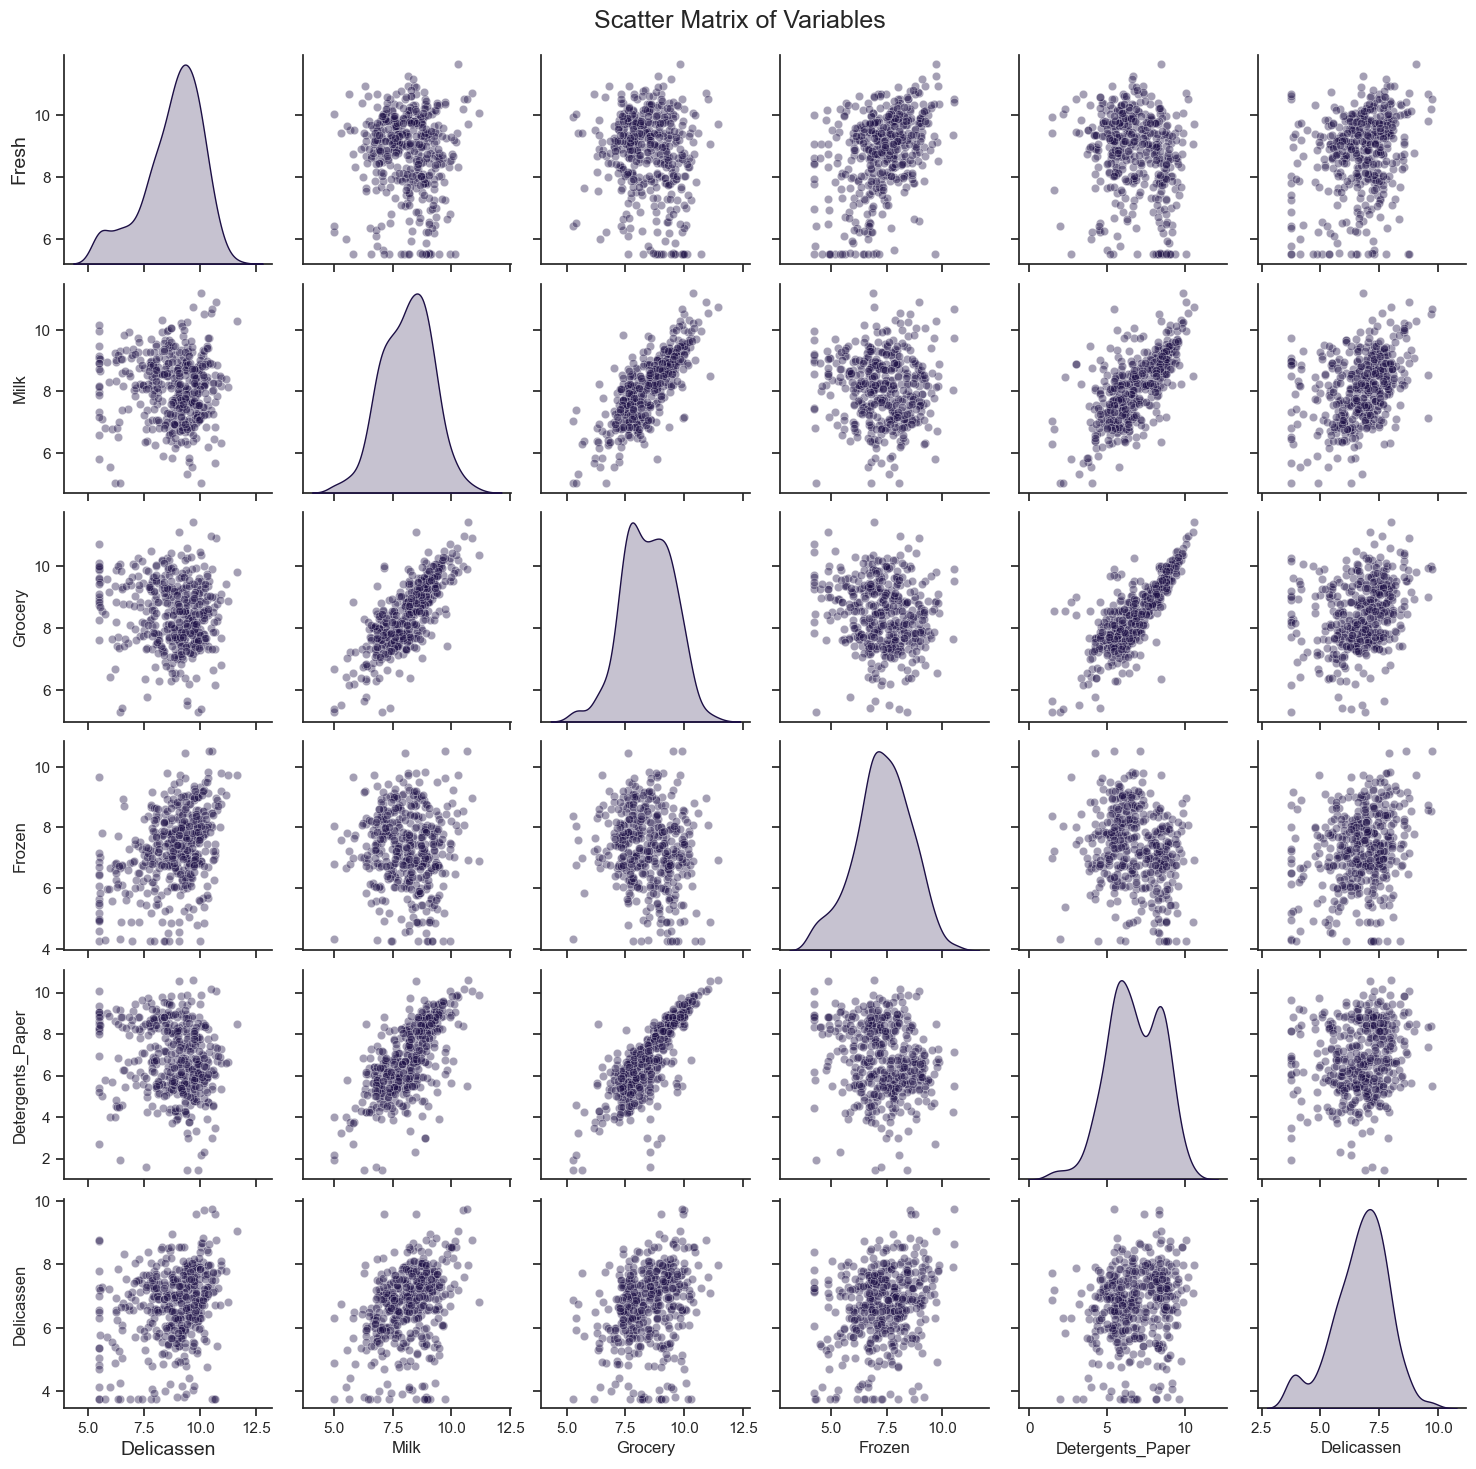

In [43]:
custom_palette = sns.color_palette(['#1c0f45'])
sns.set(style='ticks', palette=custom_palette) 
scatter_matrix = sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.4})
plt.subplots_adjust(top=0.95)  
scatter_matrix.fig.suptitle('Scatter Matrix of Variables', fontsize=18)  
scatter_matrix.axes[0, 0].set_ylabel(df.columns[0], fontsize=14)  
scatter_matrix.axes[-1, 0].set_xlabel(df.columns[-1], fontsize=14)  
plt.show()

In [59]:
#M Clustering

In [47]:
euclidean_distances = pdist(df, metric='euclidean')
cluster_hierarchy = linkage(euclidean_distances, method='average')
coph_corr, coph_dist = cophenet(cluster_hierarchy, euclidean_distances)
observation_names = np.arange(0, df.shape[0]).tolist()

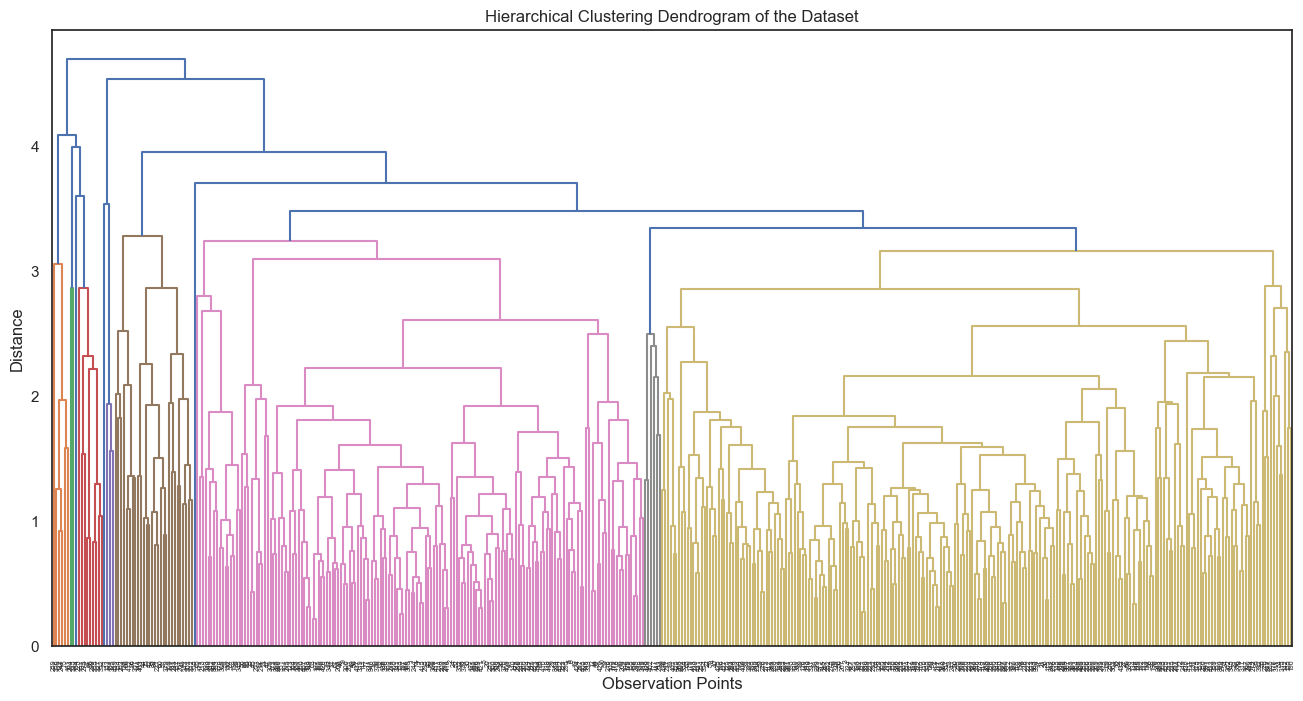

In [48]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(16, 8))
dendrogram(cluster_hierarchy, labels=observation_names)
plt.title('Hierarchical Clustering Dendrogram of the Dataset')
plt.xlabel('Observation Points')
plt.ylabel('Distance')
plt.show()

**Looking at the dendrogram graph, we decide that it would be appropriate to determine 6 clusters.**

In [49]:
print(f'Cophenetic Correlation Coefficient: {coph_corr}')

Cophenetic Correlation Coefficient: 0.6448497671919403


**When looking at the Cophenetic Correlation Coefficient (CCC) value, we can see that the dendrogram moderately reflects similarities in the dataset.**


## K-Means

In [50]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
labels = kmeans.labels_

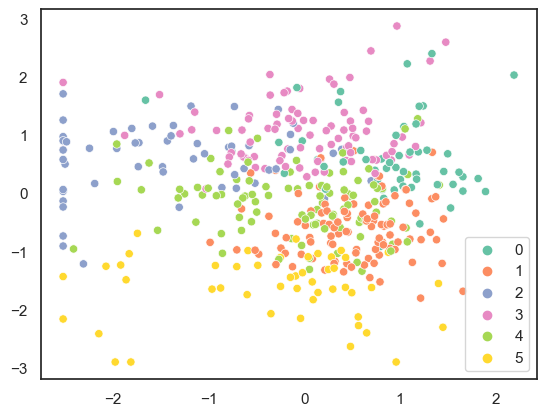

In [51]:
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels, palette='Set2')
plt.show()

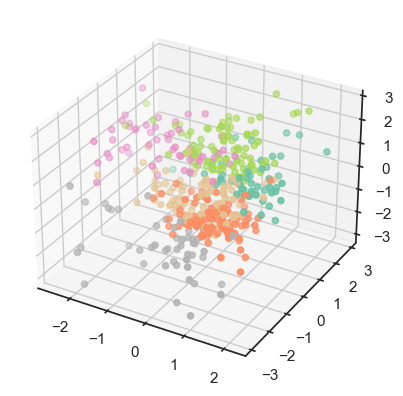

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[:, 0], df[:, 1], df[:, 2], c=labels, cmap='Set2')
plt.show()

## DBSCAN

In [53]:
dbscan = DBSCAN(eps=1)
dbscan.fit(df)
labels_dbscan = dbscan.labels_

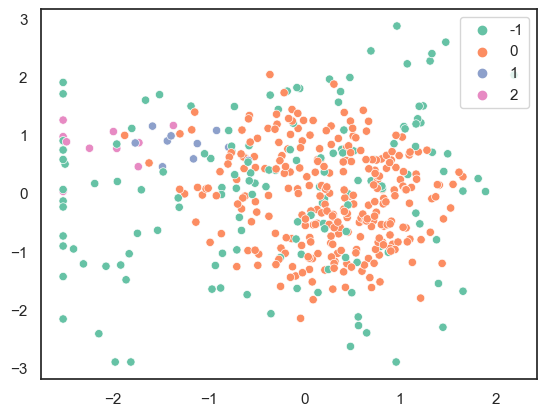

In [54]:
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels_dbscan, palette='Set2')
plt.show()